In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pyspark
import pandas as pd

In [3]:
#Creating Session
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("LinkedIn_Jobs") \
    .getOrCreate()

In [4]:
#loading Files
df_spark_skills  = spark.read.csv("job_skills.csv",header=True, inferSchema=True)
df_spark_summary = spark.read.csv("job_summary.csv",header=True, inferSchema=True)
df_spark_postings = spark.read.csv("linkedin_job_postings.csv",header=True, inferSchema=True)

In [5]:
df_spark_postings.show(10)

+--------------------+--------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+------------+--------------+--------------------+----------+--------+
|            job_link| last_processed_time|got_summary|got_ner|is_being_worked|           job_title|             company|        job_location|first_seen| search_city|search_country|     search_position| job_level|job_type|
+--------------------+--------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+------------+--------------+--------------------+----------+--------+
|https://www.linke...|2024-01-21 07:12:...|          t|      t|              f|Account Executive...|                  BD|       San Diego, CA|2024-01-15|    Coronado| United States|         Color Maker|Mid senior|  Onsite|
|https://www.linke...|2024-01-21 07:39:...|          t|      t|              f|Registered Nurse ...|   Trini

In [6]:
#Linkedin_job_postings
column_names = df_spark_postings.columns
column_names

['job_link',
 'last_processed_time',
 'got_summary',
 'got_ner',
 'is_being_worked',
 'job_title',
 'company',
 'job_location',
 'first_seen',
 'search_city',
 'search_country',
 'search_position',
 'job_level',
 'job_type']

In [7]:
#job_skills
column_names_skills=df_spark_skills.columns
column_names_skills
df_spark_skills.show(10)

+--------------------+--------------------+
|            job_link|          job_skills|
+--------------------+--------------------+
|https://www.linke...|Building Custodia...|
|https://www.linke...|Customer service,...|
|https://www.linke...|Applied Behavior ...|
|https://www.linke...|Electrical Engine...|
|https://www.linke...|Electrical Assemb...|
|https://www.linke...|Access Control, V...|
|https://www.linke...|Consultation, Sup...|
|https://www.linke...|Veterinary Recept...|
|https://www.linke...|Optical Inspectio...|
|https://www.linke...|HVAC, troubleshoo...|
+--------------------+--------------------+
only showing top 10 rows



In [8]:
#job_summary
column_names_summary=df_spark_summary.columns
column_names_summary
df_spark_summary.show(10)

+--------------------+--------------------+
|            job_link|         job_summary|
+--------------------+--------------------+
|https://www.linke...|Rock N Roll Sushi...|
|As our Restaurant...| you’ll never be ...|
|            We Offer|                NULL|
|Competitive compe...|                NULL|
|  Insurance benefits|                NULL|
| Bonus opportunities|                NULL|
|A great work atmo...|                NULL|
|Duties/Responsibi...|                NULL|
|Ensuring that our...|                NULL|
|Maintaining opera...|                NULL|
+--------------------+--------------------+
only showing top 10 rows



Linkedin_JOB_POSTINGS 

In [9]:
df_spark_postings.show(10)

+--------------------+--------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+------------+--------------+--------------------+----------+--------+
|            job_link| last_processed_time|got_summary|got_ner|is_being_worked|           job_title|             company|        job_location|first_seen| search_city|search_country|     search_position| job_level|job_type|
+--------------------+--------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+------------+--------------+--------------------+----------+--------+
|https://www.linke...|2024-01-21 07:12:...|          t|      t|              f|Account Executive...|                  BD|       San Diego, CA|2024-01-15|    Coronado| United States|         Color Maker|Mid senior|  Onsite|
|https://www.linke...|2024-01-21 07:39:...|          t|      t|              f|Registered Nurse ...|   Trini

In [10]:
#Linkedin_job_postings
column_names_postings = df_spark_postings.columns
column_names_postings

['job_link',
 'last_processed_time',
 'got_summary',
 'got_ner',
 'is_being_worked',
 'job_title',
 'company',
 'job_location',
 'first_seen',
 'search_city',
 'search_country',
 'search_position',
 'job_level',
 'job_type']

In [11]:
from pyspark.sql.functions import split

# Split the 'last_processed_time' column into two columns
df_spark_postings = df_spark_postings.withColumn("last_processed_Date", split(df_spark_postings["last_processed_time"], " ").getItem(0))
df_spark_postings = df_spark_postings.withColumn("last_processed_time", split(df_spark_postings["last_processed_time"], " ").getItem(1))

# Show the modified DataFrame
df_spark_postings.show()

+--------------------+-------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+---------------+--------------+--------------------+----------+--------+-------------------+
|            job_link|last_processed_time|got_summary|got_ner|is_being_worked|           job_title|             company|        job_location|first_seen|    search_city|search_country|     search_position| job_level|job_type|last_processed_Date|
+--------------------+-------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+---------------+--------------+--------------------+----------+--------+-------------------+
|https://www.linke...|  07:12:29.00256+00|          t|      t|              f|Account Executive...|                  BD|       San Diego, CA|2024-01-15|       Coronado| United States|         Color Maker|Mid senior|  Onsite|         2024-01-21|
|https://www.linke..

In [12]:
# Iterate over the columns and print each one
for column in df_spark_postings.columns:
    print(column)

job_link
last_processed_time
got_summary
got_ner
is_being_worked
job_title
company
job_location
first_seen
search_city
search_country
search_position
job_level
job_type
last_processed_Date


In [13]:
from pyspark.sql.functions import col, sum

# Count the number of null values in each column and transpose the result for better readability
null_counts = df_spark_postings.select([sum(col(column).isNull().cast("int")).alias(column) for column in df_spark_postings.columns]).toPandas().T

# Rename the column to "Null Counts" for clarity
null_counts.columns = ['Null Counts']

# Display the null counts
print(null_counts)

                     Null Counts
job_link                       0
last_processed_time            0
got_summary                    0
got_ner                        0
is_being_worked                0
job_title                      0
company                       45
job_location                  53
first_seen                    34
search_city                   68
search_country                68
search_position               68
job_level                     68
job_type                      69
last_processed_Date            0


In [14]:
#Let's check the job link url of null company values let's check if we can fix it.

# Filter the DataFrame to include rows where the company column has value "NULL"
null_company_df = df_spark_postings.filter(df_spark_postings["company"].isNull())
# Show the job_link column of the filtered DataFrame
null_company_df.select("job_link").show(truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------+
|job_link                                                                                                                                     |
+---------------------------------------------------------------------------------------------------------------------------------------------+
|https://uk.linkedin.com/jobs/view/senior-electrical-engineer%0A-london-at-red-engineering-design-3656952626                                  |
|https://uk.linkedin.com/jobs/view/nursery-room-manager-at-n-a-3798436161                                                                     |
|https://www.linkedin.com/jobs/view/radiologic-technologist-at-n-a-3792061142                                                                 |
|https://uk.linkedin.com/jobs/view/parts-advisor-%0A%09%09%09%09%09%09%09%09%0A%09%09%09%09%09%09%09%09%09new-at-bmw-uk-3804268098      

In [15]:
# Filter the DataFrame to include rows where the company column has value "NULL"
null_company_links = null_company_df.select("job_link").collect()

# Print all the job_link values
for row in null_company_links:
    print(row["job_link"])


https://uk.linkedin.com/jobs/view/senior-electrical-engineer%0A-london-at-red-engineering-design-3656952626
https://uk.linkedin.com/jobs/view/nursery-room-manager-at-n-a-3798436161
https://www.linkedin.com/jobs/view/radiologic-technologist-at-n-a-3792061142
https://uk.linkedin.com/jobs/view/parts-advisor-%0A%09%09%09%09%09%09%09%09%0A%09%09%09%09%09%09%09%09%09new-at-bmw-uk-3804268098
https://uk.linkedin.com/jobs/view/parts-advisor-%0A%09%09%09%09%09%09%09%09%0A%09%09%09%09%09%09%09%09%09new-at-bmw-uk-3804261722
https://uk.linkedin.com/jobs/view/parts-advisor-%0A%09%09%09%09%09%09%09%09%0A%09%09%09%09%09%09%09%09%09new-at-bmw-uk-3804266619
https://uk.linkedin.com/jobs/view/service-advisor-%0A%09%09%09%09%09%09%09%09%0A%09%09%09%09%09%09%09%09%09new-at-bmw-uk-3804261723
https://uk.linkedin.com/jobs/view/senior-electrical-engineer%0A-newcastle-upon-tyne-at-red-engineering-design-3796688975
https://uk.linkedin.com/jobs/view/internal-account-manager%0A-portsmouth-at-kite-packaging-37909174

In [16]:
df_spark_postings.show()

+--------------------+-------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+---------------+--------------+--------------------+----------+--------+-------------------+
|            job_link|last_processed_time|got_summary|got_ner|is_being_worked|           job_title|             company|        job_location|first_seen|    search_city|search_country|     search_position| job_level|job_type|last_processed_Date|
+--------------------+-------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+---------------+--------------+--------------------+----------+--------+-------------------+
|https://www.linke...|  07:12:29.00256+00|          t|      t|              f|Account Executive...|                  BD|       San Diego, CA|2024-01-15|       Coronado| United States|         Color Maker|Mid senior|  Onsite|         2024-01-21|
|https://www.linke..

In [17]:
from pyspark.sql.functions import when, regexp_extract, col

# Update the company column where it is null based on job_link
df_spark_postings = df_spark_postings.withColumn("company", 
                        when(col("company").isNull(), 
                             regexp_extract(col("job_link"), r'(?<=-at-)(.*?)(?=-\d+$)', 1)
                        ).otherwise(col("company")))

# Show the updated DataFrame
df_spark_postings.show()

+--------------------+-------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+---------------+--------------+--------------------+----------+--------+-------------------+
|            job_link|last_processed_time|got_summary|got_ner|is_being_worked|           job_title|             company|        job_location|first_seen|    search_city|search_country|     search_position| job_level|job_type|last_processed_Date|
+--------------------+-------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+---------------+--------------+--------------------+----------+--------+-------------------+
|https://www.linke...|  07:12:29.00256+00|          t|      t|              f|Account Executive...|                  BD|       San Diego, CA|2024-01-15|       Coronado| United States|         Color Maker|Mid senior|  Onsite|         2024-01-21|
|https://www.linke..

In [18]:
null_counts = df_spark_postings.select([sum(col(column).isNull().cast("int")).alias(column) for column in df_spark_postings.columns]).toPandas().T

# Rename the column to "Null Counts" for clarity
null_counts.columns = ['Null Counts']

# Display the null counts
print(null_counts)

                     Null Counts
job_link                       0
last_processed_time            0
got_summary                    0
got_ner                        0
is_being_worked                0
job_title                      0
company                        0
job_location                  53
first_seen                    34
search_city                   68
search_country                68
search_position               68
job_level                     68
job_type                      69
last_processed_Date            0


In [19]:
#check the unique names of the company to verify whether we place correct names in company column or not
from pyspark.sql.functions import substring

# Group the unique company names by the first character
grouped_companies = df_spark_postings.groupBy(substring("company", 0, 1)).agg({"company": "collect_set"})

# Sort the groups by the first character
sorted_groups = grouped_companies.sort("substring(company, 0, 1)")

# Iterate over the sorted groups and display the unique company names
for row in sorted_groups.collect():
    first_character = row["substring(company, 0, 1)"]
    companies = sorted(row["collect_set(company)"])
    
    print(f"Companies starting with '{first_character}':")
    for company in companies:
        print(company)

Companies starting with ' ':
 $16
 $65/hr w2"
 AZ)"
 CA for Abbott"
 Deutschland"
 FL"
 IL"
 IN!!"
 MA for Embecta"
 MI"
 New York"
 OH"
 Reasonable Accommodations and Program Documentation (Administrator Funded Project Level 2) Humanitarian Emergency Response and Relief Center (HERRC) *Temporary/Grant Funded*"
 TN"
 TX (On-site)"
 Tolleson and Tempe/M-F 2:30-11 and Sat/Sun hours"
 UTAH - 100% Onsite"
 Weekend Option-Senior Behavioral Health- Safety Sensitive at Conway Regional Heath System"
 Westboro Location
Companies starting with '"':
"Advanced Internet Technologies, Inc. (""AIT
"CCXchange, Inc ""CCX"""
"Celestial HANDS Massage Bed & Breakfast ""Spa"""
"Cheba Hut ""Toasted"" Subs"
"Eighty One Int""l Inc"
"John Hofmeister & Son, Inc ""dba"" Hof Haus"
"National Institute for Fitness and Sport ""NIFS"""
"Nationwide Loan Consultants ""The Borrowing Club"""
"North American Development Group (""NADG"")"
"Offshore Equipment Solutions ""OES"""
"Palestinian American Medical Association ""PA

In [20]:
df_spark_postings.show()
print(null_counts)

+--------------------+-------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+---------------+--------------+--------------------+----------+--------+-------------------+
|            job_link|last_processed_time|got_summary|got_ner|is_being_worked|           job_title|             company|        job_location|first_seen|    search_city|search_country|     search_position| job_level|job_type|last_processed_Date|
+--------------------+-------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+---------------+--------------+--------------------+----------+--------+-------------------+
|https://www.linke...|  07:12:29.00256+00|          t|      t|              f|Account Executive...|                  BD|       San Diego, CA|2024-01-15|       Coronado| United States|         Color Maker|Mid senior|  Onsite|         2024-01-21|
|https://www.linke..

In [21]:
#Let's check the job link url of null search_position values let's check if we can fix it.

# Filter the DataFrame to include rows where the company column has value "NULL"
null_position_df = df_spark_postings.filter(df_spark_postings["search_position"].isNull())
# Show the job_link column of the filtered DataFrame
null_company_df.select("job_link").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------+
|job_link                                                                                                                                     |
+---------------------------------------------------------------------------------------------------------------------------------------------+
|https://uk.linkedin.com/jobs/view/senior-electrical-engineer%0A-london-at-red-engineering-design-3656952626                                  |
|https://uk.linkedin.com/jobs/view/nursery-room-manager-at-n-a-3798436161                                                                     |
|https://www.linkedin.com/jobs/view/radiologic-technologist-at-n-a-3792061142                                                                 |
|https://uk.linkedin.com/jobs/view/parts-advisor-%0A%09%09%09%09%09%09%09%09%0A%09%09%09%09%09%09%09%09%09new-at-bmw-uk-3804268098      

In [22]:
#search Position Null Value is fixed
from pyspark.sql.functions import when, regexp_extract, col

# Update the search_position column where it is null based on job_link
df_spark_postings = df_spark_postings.withColumn("search_position",
                        when(col("search_position").isNull(), 
                             regexp_extract(col("job_link"), r'(?<=view\/)(.*?)(?=-%0A)', 1)
                        ).otherwise(col("search_position")))

# Show the updated DataFrame
df_spark_postings.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------+-------------------+-----------+-------+---------------+--------------------------------------------------------------------------+-------------------------------------+----------------------------------+----------+---------------+--------------+------------------------------------+----------+--------+-------------------+
|job_link                                                                                                                         |last_processed_time|got_summary|got_ner|is_being_worked|job_title                                                                 |company                              |job_location                      |first_seen|search_city    |search_country|search_position                     |job_level |job_type|last_processed_Date|
+-----------------------------------------------------------------------------------------

In [41]:
null_counts_postings = df_spark_postings.select([sum(col(column).isNull().cast("int")).alias(column) for column in df_spark_postings.columns]).toPandas().T

# Rename the column to "Null Counts" for clarity
null_counts.columns = ['Null Counts']

# Display the null counts
print(null_counts_postings)

                      0
job_link              0
last_processed_time   0
got_summary           0
got_ner               0
is_being_worked       0
job_title             0
company               0
job_location         53
first_seen           34
search_city          68
search_country       68
search_position       0
job_level            68
job_type             69
last_processed_Date   0


In [24]:
# Get all the unique job positions
unique_job_positions = df_spark_postings.select("search_position").distinct()

# Show all unique job positions without truncation
unique_job_positions.show(unique_job_positions.count(), truncate=False)


+----------------------------------------------------+
|search_position                                     |
+----------------------------------------------------+
|Reproduction Technician                             |
|Layer                                               |
|Operations-Research Analyst                         |
|Preparation-Room Worker                             |
|Millwright Supervisor                               |
|Hot-Room Attendant                                  |
|Assembler                                           |
|Tester                                              |
|Bus Driver                                          |
|Archeologist                                        |
|Instructor Extension Work                           |
|Supervisor Show Operations                          |
|Equal Opportunity Officer                           |
|Supervisor Packing                                  |
|Survival Specialist                                 |
|Porter   

In [42]:
df_spark_postings.show()
null_counts_postings = df_spark_postings.select([sum(col(column).isNull().cast("int")).alias(column) for column in df_spark_postings.columns]).toPandas().T

# Rename the column to "Null Counts" for clarity
null_counts.columns = ['Null Counts']

# Display the null counts
print(null_counts_postings)

+--------------------+-------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+---------------+--------------+--------------------+----------+--------+-------------------+
|            job_link|last_processed_time|got_summary|got_ner|is_being_worked|           job_title|             company|        job_location|first_seen|    search_city|search_country|     search_position| job_level|job_type|last_processed_Date|
+--------------------+-------------------+-----------+-------+---------------+--------------------+--------------------+--------------------+----------+---------------+--------------+--------------------+----------+--------+-------------------+
|https://www.linke...|  07:12:29.00256+00|          t|      t|              f|Account Executive...|                  BD|       San Diego, CA|2024-01-15|       Coronado| United States|         Color Maker|Mid senior|  Onsite|         2024-01-21|
|https://www.linke..

Job_Postings_Analysis

In [47]:
# all the job_title in Uppper case
from pyspark.sql.functions import upper, regexp_replace

# Convert job_title to upper case
df_spark_postings = df_spark_postings.withColumn("job_title", upper(df_spark_postings["job_title"]))

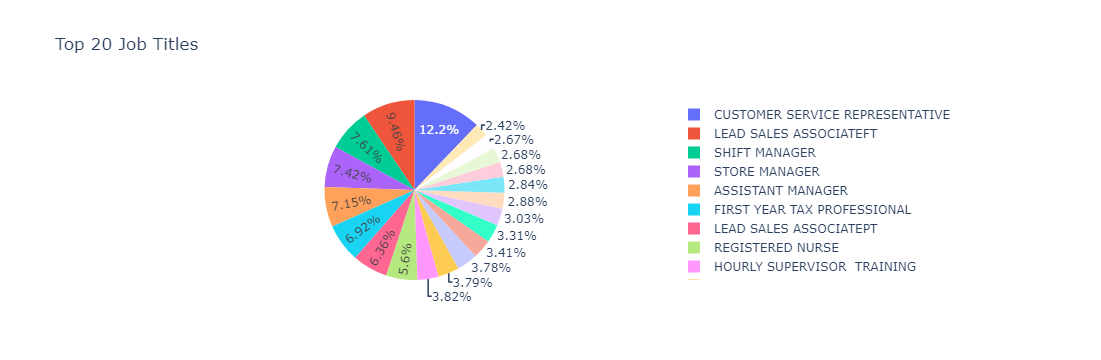

In [48]:
import plotly.express as px

# Count occurrences of each job title
job_title_counts = df_spark_postings.groupBy("job_title").count()

# Select the top 20 job titles
top_job_titles = job_title_counts.orderBy("count", ascending=False).limit(20)

# Create a pie chart
fig = px.pie(top_job_titles.toPandas(), names="job_title", values="count", title="Top 20 Job Titles")
fig.show()


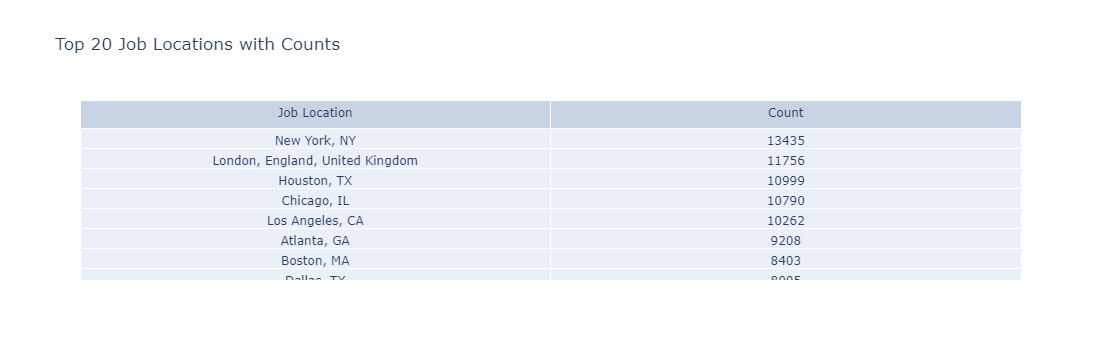

In [51]:
import plotly.graph_objects as go

# Filter out null rows in job_location column
filtered_df = df_spark_postings.filter(df_spark_postings["job_location"].isNotNull())

# Group by job_location and count occurrences, then select the top 20
top_job_locations = filtered_df.groupby("job_location").count().orderBy("count", ascending=False).limit(20)

# Convert Spark DataFrame to Pandas DataFrame
top_job_locations_pd = top_job_locations.toPandas()

# Create an interactive table
fig = go.Figure(data=[go.Table(
    header=dict(values=["Job Location", "Count"]),
    cells=dict(values=[top_job_locations_pd['job_location'], top_job_locations_pd['count']])
)])

# Update layout
fig.update_layout(title='Top 20 Job Locations with Counts')

# Show the table
fig.show()

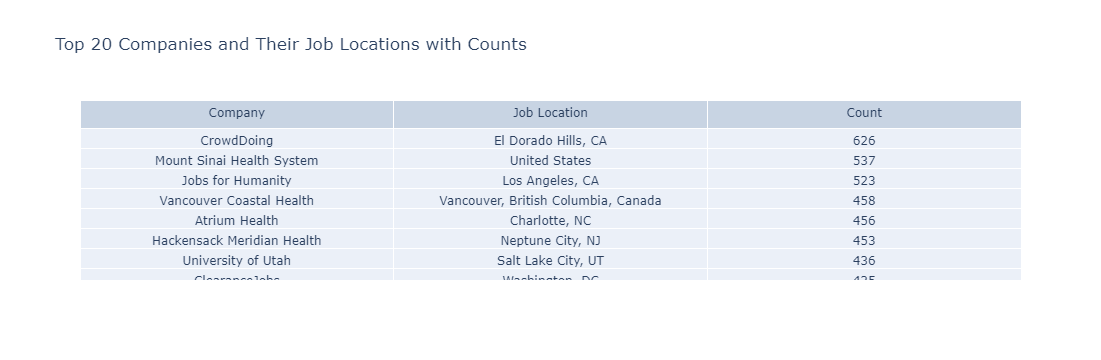

In [52]:
import plotly.graph_objects as go

# Filter out null rows in job_location column
filtered_df = df_spark_postings.filter(df_spark_postings["job_location"].isNotNull())

# Group by company and job_location and count occurrences, then select the top 20
top_companies_job_location = filtered_df.groupby("company", "job_location").count().orderBy("count", ascending=False).limit(20)

# Convert Spark DataFrame to Pandas DataFrame
top_companies_job_location_pd = top_companies_job_location.toPandas()

# Create an interactive table
fig = go.Figure(data=[go.Table(
    header=dict(values=["Company", "Job Location", "Count"]),
    cells=dict(values=[top_companies_job_location_pd['company'], top_companies_job_location_pd['job_location'], top_companies_job_location_pd['count']])
)])

# Update layout
fig.update_layout(title='Top 20 Companies and Their Job Locations with Counts')

# Show the table
fig.show()

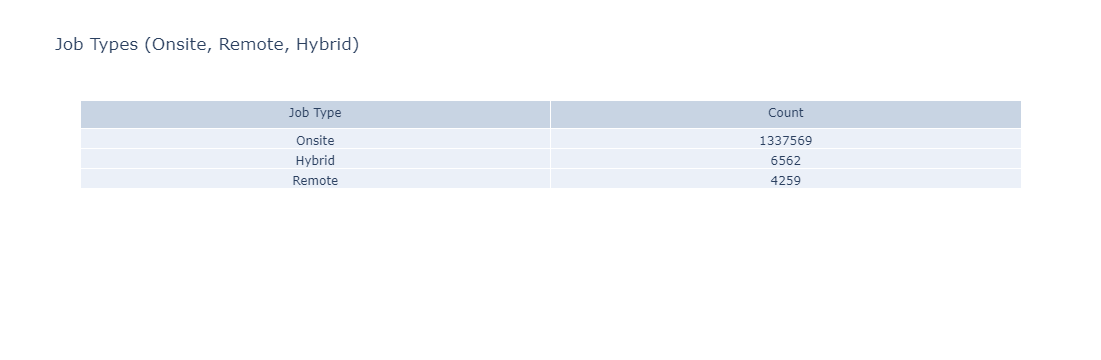

In [60]:
import plotly.graph_objects as go

# Filter out null rows and filter by job types "onsite", "remote", or "hybrid"
filtered_df = df_spark_postings.filter(
    (df_spark_postings["job_type"].isNotNull()) & 
    (df_spark_postings["job_type"].isin(["Onsite", "Remote", "Hybrid"]))
)

# Group by job_type and count occurrences, then select the top 20
top_job_types = filtered_df.groupby("job_type").count().orderBy("count", ascending=False).limit(20)

# Convert Spark DataFrame to Pandas DataFrame
top_job_types_pd = top_job_types.toPandas()

# Create a table graph
fig = go.Figure(data=[go.Table(
    header=dict(values=['Job Type', 'Count']),
    cells=dict(values=[top_job_types_pd['job_type'], top_job_types_pd['count']])
)])

# Update layout
fig.update_layout(title='Job Types (Onsite, Remote, Hybrid)')

# Show the graph
fig.show()

Let's work on skills

In [25]:
df_spark_skills.show(20)

+--------------------+--------------------+
|            job_link|          job_skills|
+--------------------+--------------------+
|https://www.linke...|Building Custodia...|
|https://www.linke...|Customer service,...|
|https://www.linke...|Applied Behavior ...|
|https://www.linke...|Electrical Engine...|
|https://www.linke...|Electrical Assemb...|
|https://www.linke...|Access Control, V...|
|https://www.linke...|Consultation, Sup...|
|https://www.linke...|Veterinary Recept...|
|https://www.linke...|Optical Inspectio...|
|https://www.linke...|HVAC, troubleshoo...|
|https://www.linke...|Host/Server Assis...|
|https://www.linke...|Apartment mainten...|
|https://www.linke...|Fiber Optic Cable...|
|https://www.linke...|CT Technologist, ...|
|https://ca.linked...|SAP, DRMIS, Data ...|
|https://www.linke...|Debt and equity o...|
|https://ca.linked...|Biomedical Engine...|
|https://www.linke...|Laboratory Techni...|
|https://www.linke...|Program Managemen...|
|https://www.linke...|Hiring, Tr

In [26]:
null_counts = df_spark_skills.select([sum(col(column).isNull().cast("int")).alias(column) for column in df_spark_skills.columns]).toPandas().T

# Rename the column to "Null Counts" for clarity
null_counts.columns = ['Null Counts']

# Display the null counts
print(null_counts)

            Null Counts
job_link              0
job_skills         2007


In [27]:
# Count the number of rows in the DataFrame
row_count = df_spark_skills.count()

# Print the number of rows
print("Number of rows in df_spark_skills:", row_count)

Number of rows in df_spark_skills: 1296381


In [28]:
# Drop rows where job_skills is NULL
df_spark_skills = df_spark_skills.dropna(subset=["job_skills"])

# Check the number of rows after dropping NULL values
row_count_cleaned = df_spark_skills.count()

# Print the number of rows after dropping NULL values
print("Number of rows in df_spark_skills after dropping NULL values in job_skills:", row_count_cleaned)

Number of rows in df_spark_skills after dropping NULL values in job_skills: 1294374


In [29]:
null_counts = df_spark_skills.select([sum(col(column).isNull().cast("int")).alias(column) for column in df_spark_skills.columns]).toPandas().T

# Rename the column to "Null Counts" for clarity
null_counts.columns = ['Null Counts']

# Display the null counts
print(null_counts)

            Null Counts
job_link              0
job_skills            0


In [30]:
df_spark_skills.show()

+--------------------+--------------------+
|            job_link|          job_skills|
+--------------------+--------------------+
|https://www.linke...|Building Custodia...|
|https://www.linke...|Customer service,...|
|https://www.linke...|Applied Behavior ...|
|https://www.linke...|Electrical Engine...|
|https://www.linke...|Electrical Assemb...|
|https://www.linke...|Access Control, V...|
|https://www.linke...|Consultation, Sup...|
|https://www.linke...|Veterinary Recept...|
|https://www.linke...|Optical Inspectio...|
|https://www.linke...|HVAC, troubleshoo...|
|https://www.linke...|Host/Server Assis...|
|https://www.linke...|Apartment mainten...|
|https://www.linke...|Fiber Optic Cable...|
|https://www.linke...|CT Technologist, ...|
|https://ca.linked...|SAP, DRMIS, Data ...|
|https://www.linke...|Debt and equity o...|
|https://ca.linked...|Biomedical Engine...|
|https://www.linke...|Laboratory Techni...|
|https://www.linke...|Program Managemen...|
|https://www.linke...|Hiring, Tr

In [31]:
from pyspark.sql.functions import lower

# Convert all skills in job_skill column to lowercase
df_spark_skills = df_spark_skills.withColumn("job_skills", lower(col("job_skills")))

# Show the DataFrame with lowercase skills
df_spark_skills.show()


+--------------------+--------------------+
|            job_link|          job_skills|
+--------------------+--------------------+
|https://www.linke...|building custodia...|
|https://www.linke...|customer service,...|
|https://www.linke...|applied behavior ...|
|https://www.linke...|electrical engine...|
|https://www.linke...|electrical assemb...|
|https://www.linke...|access control, v...|
|https://www.linke...|consultation, sup...|
|https://www.linke...|veterinary recept...|
|https://www.linke...|optical inspectio...|
|https://www.linke...|hvac, troubleshoo...|
|https://www.linke...|host/server assis...|
|https://www.linke...|apartment mainten...|
|https://www.linke...|fiber optic cable...|
|https://www.linke...|ct technologist, ...|
|https://ca.linked...|sap, drmis, data ...|
|https://www.linke...|debt and equity o...|
|https://ca.linked...|biomedical engine...|
|https://www.linke...|laboratory techni...|
|https://www.linke...|program managemen...|
|https://www.linke...|hiring, tr

In [32]:
# Print all the skills in job_skills_lower column
df_spark_skills.show()

+--------------------+--------------------+
|            job_link|          job_skills|
+--------------------+--------------------+
|https://www.linke...|building custodia...|
|https://www.linke...|customer service,...|
|https://www.linke...|applied behavior ...|
|https://www.linke...|electrical engine...|
|https://www.linke...|electrical assemb...|
|https://www.linke...|access control, v...|
|https://www.linke...|consultation, sup...|
|https://www.linke...|veterinary recept...|
|https://www.linke...|optical inspectio...|
|https://www.linke...|hvac, troubleshoo...|
|https://www.linke...|host/server assis...|
|https://www.linke...|apartment mainten...|
|https://www.linke...|fiber optic cable...|
|https://www.linke...|ct technologist, ...|
|https://ca.linked...|sap, drmis, data ...|
|https://www.linke...|debt and equity o...|
|https://ca.linked...|biomedical engine...|
|https://www.linke...|laboratory techni...|
|https://www.linke...|program managemen...|
|https://www.linke...|hiring, tr

In [33]:
from pyspark.sql.functions import lower, concat_ws

# Concatenate all job skills into a single string separated by ','
skills_concatenated = df_spark_skills.select(concat_ws(", ", "job_skills").alias("skills"))

# Convert the concatenated string to lowercase
skills_lower = skills_concatenated.select(lower("skills").alias("skills_lower"))

# Show the first 10 skills and the total count
skills_list = skills_lower.first()["skills_lower"].split(", ")
skills_list[:10], len(skills_list)

(['building custodial services',
  'cleaning',
  'janitorial services',
  'materials handling',
  'housekeeping',
  'sanitation',
  'waste management',
  'floor maintenance',
  'equipment maintenance',
  'safety protocols'],
 14)

In [36]:
from pyspark.sql.functions import explode, lower

# Split the concatenated string into separate skills
exploded_skills = skills_lower.select(explode(split("skills_lower", ", ")).alias("skill"))

# Group by skill and count the occurrences of each skill
skill_counts = exploded_skills.groupBy("skill").count()

# Order the DataFrame by count in descending order
skill_counts_descending = skill_counts.orderBy("count", ascending=False)

# Show the resulting DataFrame
skill_counts_descending.show(30)

+--------------------+------+
|               skill| count|
+--------------------+------+
|       communication|370052|
|    customer service|278033|
|            teamwork|227548|
|communication skills|195837|
|          leadership|185138|
|     problem solving|148992|
|     time management|142873|
| attention to detail|133929|
|      problemsolving|129299|
|  project management|121525|
|interpersonal skills|100223|
|        patient care| 99912|
|               sales| 92983|
|             nursing| 87949|
|       collaboration| 87086|
|            training| 83639|
|       data analysis| 81949|
|microsoft office ...| 75508|
|organizational sk...| 75257|
|inventory management| 71902|
| high school diploma| 67244|
|          scheduling| 64452|
|   bachelor's degree| 63451|
|        multitasking| 62025|
|   analytical skills| 60742|
|    microsoft office| 60587|
|        adaptability| 59101|
|         flexibility| 56870|
|   critical thinking| 53073|
|       documentation| 51866|
+---------

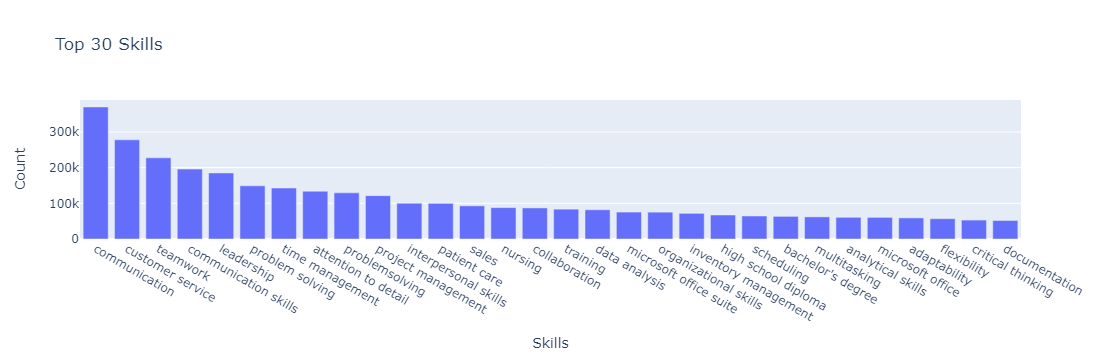

In [39]:
import plotly.graph_objs as go
import plotly.io as pio

# Get the top 30 skills and their counts
top_skills = skill_counts_descending.limit(30).toPandas()

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=top_skills['skill'],
    y=top_skills['count']
)])

# Set the layout for the plot
fig.update_layout(
    title='Top 30 Skills',
    xaxis_title='Skills',
    yaxis_title='Count'
)

# Show the plot
pio.show(fig)


Job_Summary